# 06 Example - Sparse Experiment

In [1]:
import pyscan as ps
import numpy as np
import matplotlib.pyplot as plt

## Setup devices

In [2]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage()
devices.v2 = ps.TestVoltage()

## Define a measure function

In [3]:
def get_voltage_data(expt):
    """
    Reads the voltage from v1, v2 devices, and adds a calculated value vsum
    """
     
    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    d.v1 = devices.v1.voltage
    d.v2 = devices.v2.voltage

    d.vsum = d.v1 + d.v2    

    return d

## Define function to generate sparse points

In [4]:
from random import random, choices

def uniform_cartesian_points(runinfo, percent):
    ''' Create a mask (a 2D list) whose shape matches the dimensions of scan0 and scan1. 
    A value of 0 means the corresponding point will not be collected; 
    a value of 1 means that the point will be collected.

    The `percent` argument determines the percentage of total points that will be collected.
    '''
    sparse_points = np.zeros(runinfo.dims)
    n_points = np.prod(runinfo.dims)
    points = np.array(np.where(sparse_points==0)).T
    rand_points = choices(points, k=int(percent / 100 * n_points)) # k is number of random points to collect
    mask = tuple(map(tuple, np.array(rand_points).T))
    sparse_points[mask] = 1

    return sparse_points

## Experiments

### 1. 2D Scan using SparseExperiment

In [5]:
# Setup runinfo with scan0 and scan1 as PropertyScan
runinfo = ps.RunInfo()

runinfo.scan0 = ps.PropertyScan({'v1': ps.drange(0, 0.02, 2)}, prop='voltage', dt=0.01)
runinfo.scan1 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 10)}, prop='voltage', dt=0.01)

runinfo.sparse_points = uniform_cartesian_points(runinfo, percent = 10)
runinfo.measure_function = get_voltage_data

expt = ps.SparseExperiment(runinfo, devices)

expt.start_thread()

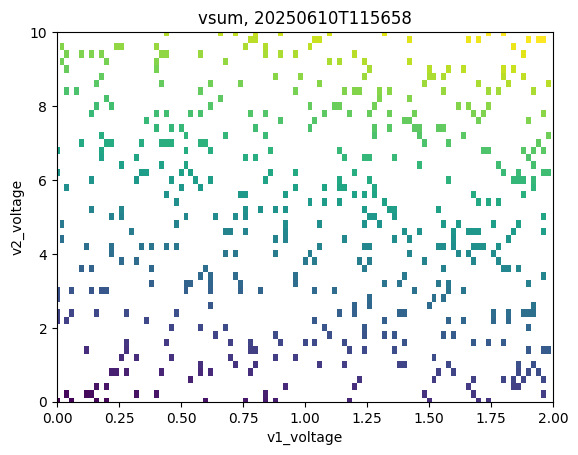

In [6]:
ps.live_plot2D(expt, data_name="vsum")